# Recurrent Neural Networks

calcular o preço das ações do google

In [1]:
# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the training set
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [3]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [4]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.07846566],
        [0.08034452],
        [0.08497656]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.08034452],
        [0.08497656],
        [0.08627874]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.08497656],
        [0.08627874],
        [0.08471612]],

       ...,

       [[0.92106928],
        [0.92438053],
        [0.93048218],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.92438053],
        [0.93048218],
        [0.9299055 ],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.93048218],
        [0.9299055 ],
        [0.93113327],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

In [5]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import GRU
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(GRU(units = 64,activation="relu", return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(GRU(units = 64,activation="tanh", return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(GRU(units = 64,activation="tanh", return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(GRU(units = 64,activation="tanh"))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adamax', loss = 'mean_squared_error')

In [6]:
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 125, batch_size = 32)

Epoch 1/125
38/38 [==============================] - 9s 92ms/step - loss: 0.0513
Epoch 2/125
38/38 [==============================] - 3s 90ms/step - loss: 0.0062
Epoch 3/125
38/38 [==============================] - 4s 93ms/step - loss: 0.0043
Epoch 4/125
38/38 [==============================] - 4s 93ms/step - loss: 0.0045
Epoch 5/125
38/38 [==============================] - 3s 89ms/step - loss: 0.0042
Epoch 6/125
38/38 [==============================] - 3s 91ms/step - loss: 0.0039
Epoch 7/125
38/38 [==============================] - 4s 96ms/step - loss: 0.0037
Epoch 8/125
38/38 [==============================] - 4s 95ms/step - loss: 0.0040
Epoch 9/125
38/38 [==============================] - 3s 92ms/step - loss: 0.0037
Epoch 10/125
38/38 [==============================] - 4s 101ms/step - loss: 0.0039
Epoch 11/125
38/38 [==============================] - 4s 101ms/step - loss: 0.0037
Epoch 12/125
38/38 [==============================] - 4s 93ms/step - loss: 0.0035
Epoch 13/125
38/38 [===

38/38 [==============================] - 4s 95ms/step - loss: 0.0018: 0s - loss: 
Epoch 101/125
38/38 [==============================] - 4s 104ms/step - loss: 0.0017
Epoch 102/125
38/38 [==============================] - 3s 89ms/step - loss: 0.0018
Epoch 103/125
38/38 [==============================] - 4s 104ms/step - loss: 0.0019
Epoch 104/125
38/38 [==============================] - 4s 97ms/step - loss: 0.0017
Epoch 105/125
38/38 [==============================] - 4s 102ms/step - loss: 0.0017
Epoch 106/125
38/38 [==============================] - 4s 103ms/step - loss: 0.0017
Epoch 107/125
38/38 [==============================] - 4s 99ms/step - loss: 0.0017
Epoch 108/125
38/38 [==============================] - 4s 108ms/step - loss: 0.0017
Epoch 109/125
38/38 [==============================] - 4s 101ms/step - loss: 0.0018
Epoch 110/125
38/38 [==============================] - 4s 95ms/step - loss: 0.0016
Epoch 111/125
38/38 [==============================] - 4s 102ms/step - loss: 0.001

In [7]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

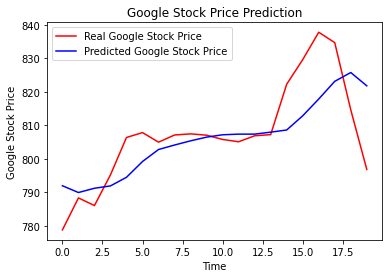

In [8]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

## FIM